In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import matplotlib.dates as mdates

from matplotlib.dates import DateFormatter
from scipy.stats import zscore


In [2]:
df = pd.read_csv("/content/data/state_level_data.csv")

In [3]:
df

RegionName StateName        Date       TopTier  \
0           Los Angeles, CA        CA  2020-06-30  1.162437e+06   
1               Chicago, IL        IL  2020-06-30  4.229209e+05   
2                Dallas, TX        TX  2020-06-30  4.371268e+05   
3               Houston, TX        TX  2020-06-30  3.954540e+05   
4            Washington, DC        VA  2020-06-30  7.652434e+05   
...                     ...       ...         ...           ...   
5891         Burlington, NC        NC  2025-03-31  4.261431e+05   
5892      Coeur d'Alene, ID        ID  2025-03-31  9.745493e+05   
5893  Homosassa Springs, FL        FL  2025-03-31  4.419423e+05   
5894           New Bern, NC        NC  2025-03-31  4.019812e+05   
5895          Pinehurst, NC        NC  2025-03-31  6.577130e+05   

         MiddleTier     BottomTier   SingleFamily          Condo  \
0     692709.155101  482112.916477  722666.052404  523499.776213   
1     250456.136880  149956.832438  257755.873117  206966.438442   
2     271809.179451  181797.447883  270853.514036  183579.390198   
3     234440.009994  156726.798926  234904.625421  128670.425313   
4     457671.530975  294673.564753  485376.289901  311181.199984   
...             ...            ...            ...            ...   
5891  288087.556339  188068.687464  294439.326895  229255.599967   
5892  579544.543582  439605.325510  592639.216180  444773.787424   
5893  278521.607429  196035.541661  286283.642360  181053.046071   
5894  251865.956852  135448.106946  254863.558846  237662.941327   
5895  411854.375449  240179.828200  422162.931793  288227.741200   

               1BHK           2BHK  ...  MultifamilyRent  SingleFamilyRent  \
0     445203.481299  550611.075757  ...      2174.202572       3229.571802   
1     160923.952997  180026.944146  ...      1672.908263       1824.532020   
2     133926.022959  170464.587332  ...      1286.185507       1751.036748   
3     111340.432485  143931.616756  ...      1243.348378       1708.691620   
4     310598.231169  341672.342936  ...      1927.924415       2476.972553   
...             ...            ...  ...              ...               ...   
5891  135550.291098  182464.372871  ...      1293.038964       1740.784086   
5892  452692.237506  465385.582532  ...      1606.621672       2373.684270   
5893  144811.417838  207104.462386  ...      1273.570758       1770.604870   
5894  174217.015791  164824.003477  ...      1389.086809       1636.428276   
5895  222449.104147  269071.376068  ...      1607.458165       2199.448992   

      SeasonalAllHomesRent  SeasonalMultifamilyRent  SeasonalSingleFamilyRent  \
0              2320.978200              2183.842961               3232.197550   
1              1677.557975              1658.497632               1818.115553   
2              1383.192096              1283.038454               1750.281954   
3              1375.329884              1247.742053               1703.780426   
4              1962.207966              1922.069989               2461.170188   
...                    ...                      ...                       ...   
5891           1532.685122              1289.201269               1742.359451   
5892           1903.084635              1626.643858               2391.402830   
5893           1727.971464              1251.004036               1771.582570   
5894           1517.113848              1382.782403               1658.067864   
5895           2074.106461              1646.907676               2233.699483   

      ZORDI  PctSoldBelowList  NewConSalePrice  NewConSalePriceSqFt  \
0     134.0          0.501218        1098253.0           607.024834   
1      97.0          0.697391         482860.0           181.670786   
2     108.0          0.520436         341732.0           142.478673   
3      46.0          0.634123         303720.0           130.118343   
4     102.0          0.367973         558642.5           205.695398   
...     ...               ...              ...             

In [4]:
# Select only original numeric features for clean visualizations
numeric_cols = df.select_dtypes(include=[np.number])

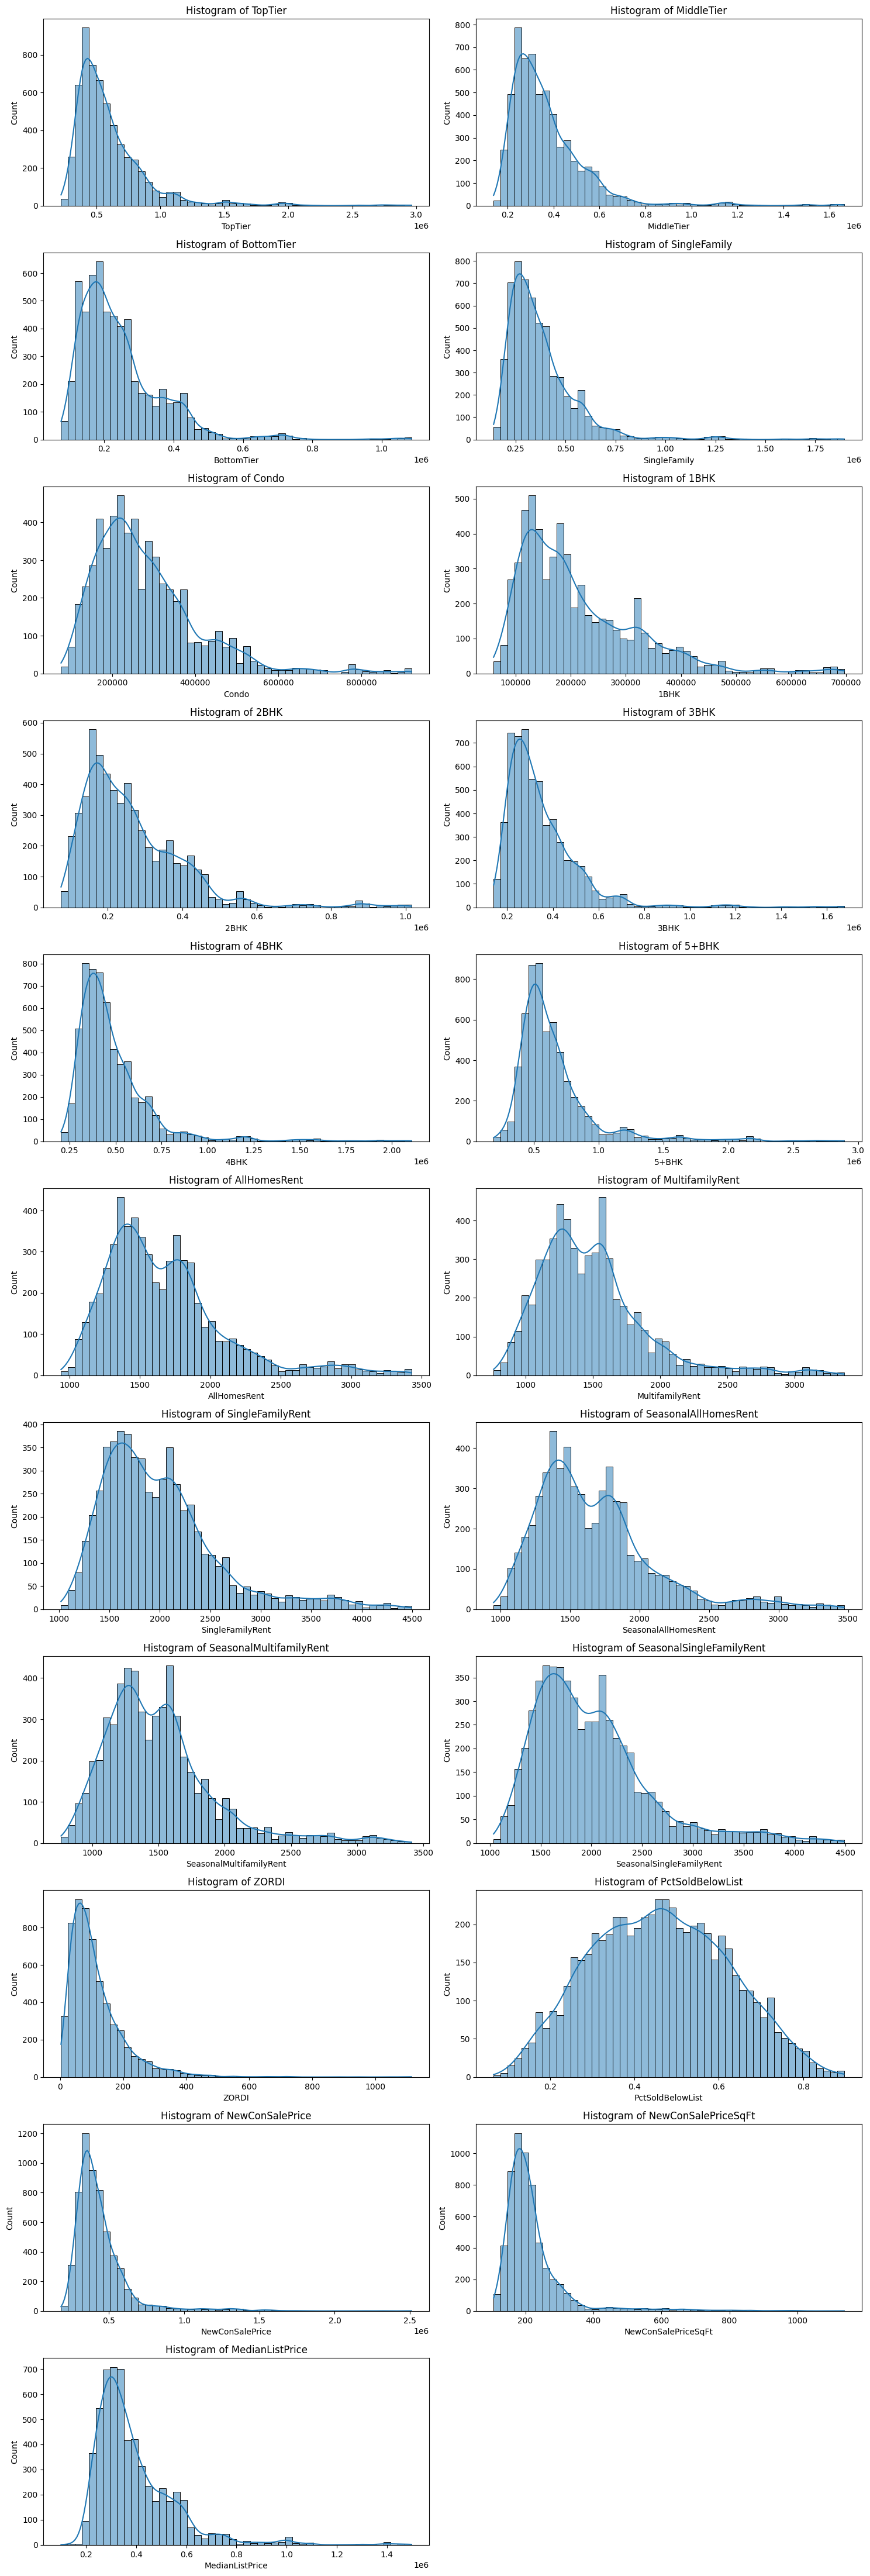

In [5]:
# The plot contains side-by-side histograms comparing the original, log-transformed, and scaled versions of various features.

# Determine layout
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()
plt.close()

####Each row represents a feature across:

* **Raw Scale** (e.g., Histogram of TopTier)

* **Log-transformed** (e.g., Histogram of TopTier_log)

* **Scaled** (e.g., Histogram of TopTier_scaled)



#### Key Observations
* **Features like TopTier, BottomTier, ZORDI, and NewConSalePrice:**

    Are highly skewed in raw form

    Look much more normal after log transform

* **Features like PctSoldBelowList:**

    Were already closer to uniform or symmetric

    Might not benefit much from transformation

* **Log transformation visibly:**

    Compresses outliers

    Makes features more Gaussian, aiding linear models

* **Scaled versions center the distributions (around 0), making them ideal for models like:**

    Logistic regression

    Neural networks

    Gradient descent based algorithms



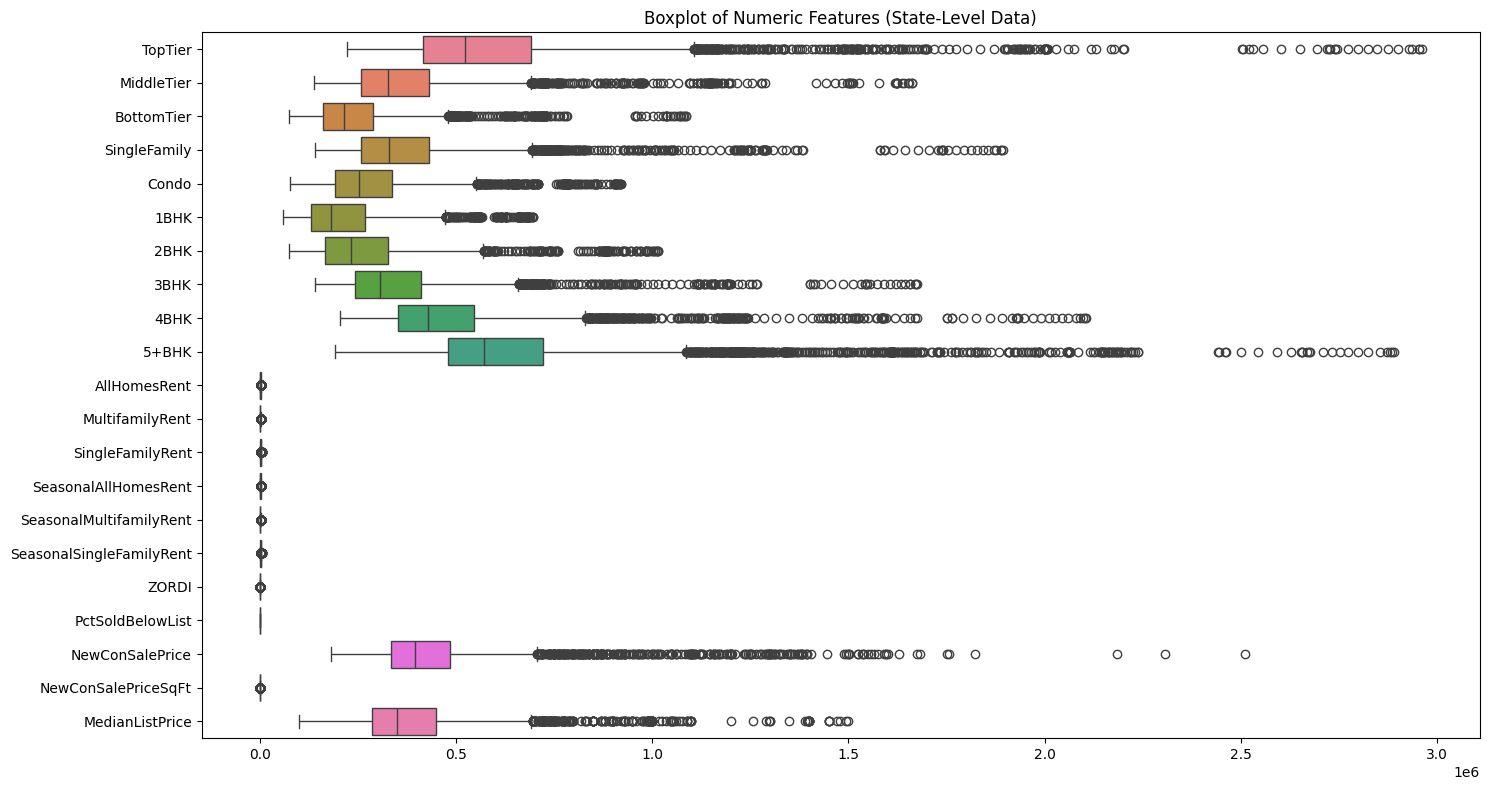

In [6]:
# Boxplot for visual outlier detection
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient="h")
plt.title("Boxplot of Numeric Features (State-Level Data)")
plt.tight_layout()
plt.show()
plt.close()

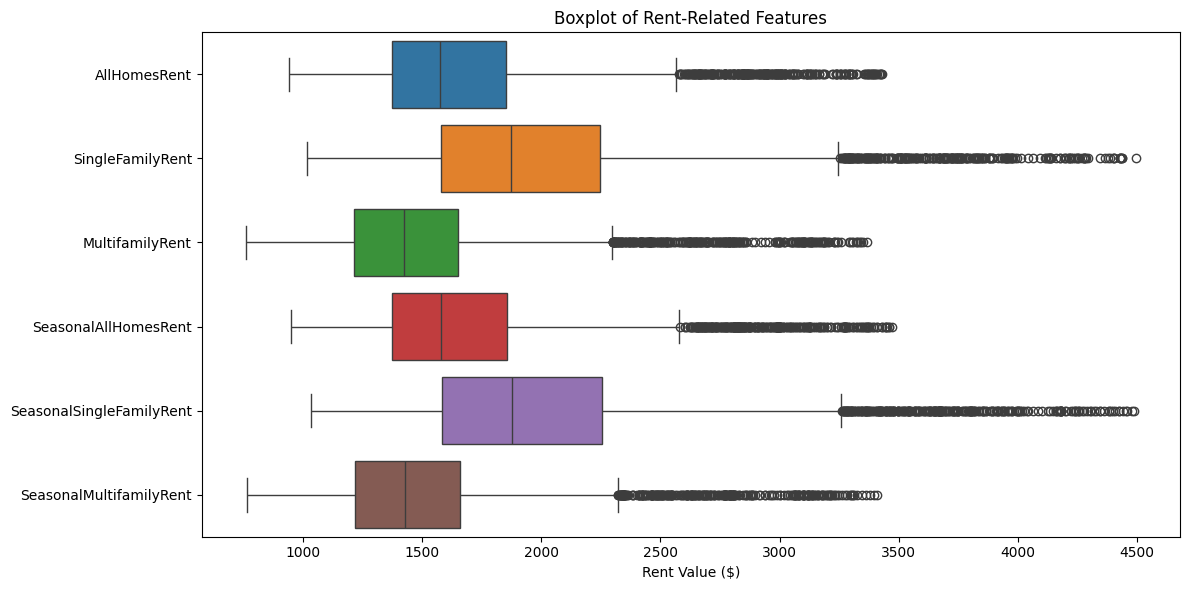

In [7]:
# Select only rent-related features for clearer visualization
rent_features = [
    "AllHomesRent", "SingleFamilyRent", "MultifamilyRent",
    "SeasonalAllHomesRent", "SeasonalSingleFamilyRent", "SeasonalMultifamilyRent"
]

# Drop missing values for these features
df_rent = df[rent_features].dropna()

# Create boxplot for rent-related features only
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rent, orient='h')
plt.title("Boxplot of Rent-Related Features")
plt.xlabel("Rent Value ($)")
plt.tight_layout()
plt.show()

This rent-only boxplot gives a clear and focused view of the distribution and spread of different rent types, now that they're visualized on a comparable scale:

Interpreting the Plot:
1. AllHomesRent
* Median rent around $1,800

* IQR mostly between $1,500 and $2,100

* Has some high-value outliers approaching $3,500+

2. SingleFamilyRent
* Slightly higher median than AllHomesRent

* Broader range and more extreme outliers → larger homes, higher premiums

3. MultifamilyRent
* Tighter distribution

* Median closer to $1,500

* Fewer high-end outliers than single-family homes

4. Seasonal Variants
* Follow the same trend as their non-seasonal counterparts

* Show similar spread and distribution, though slightly lower for SeasonalMultifamilyRent



In [8]:
# Z-Score method
z_scores = np.abs(zscore(numeric_cols, nan_policy='omit'))
z_score_outliers = (z_scores > 3)
z_score_outlier_summary = pd.DataFrame(z_score_outliers, columns=numeric_cols.columns).sum()


In [9]:
# IQR method
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
iqr_outlier_summary = iqr_outliers.sum()

In [10]:
# Combine Z-score and IQR outlier counts into one DataFrame
outlier_summary = pd.DataFrame({
    'Z-Score Outliers': z_score_outlier_summary,
    'IQR Outliers': iqr_outlier_summary
})

In [11]:
display(outlier_summary)

Z-Score Outliers  IQR Outliers
TopTier                                134           299
MiddleTier                             113           208
BottomTier                             117           216
SingleFamily                           114           272
Condo                                  110           196
1BHK                                   110           159
2BHK                                   119           162
3BHK                                   112           257
4BHK                                   140           302
5+BHK                                  153           463
AllHomesRent                           128           286
MultifamilyRent                        135           300
SingleFamilyRent                       122           293
SeasonalAllHomesRent                   126           280
SeasonalMultifamilyRent                137           288
SeasonalSingleFamilyRent               113           291
ZORDI                                   91           309
PctSoldBelowList                         0             0
NewConSalePrice                        142           314
NewConSalePriceSqFt                    150           381
MedianListPrice                        119           291

####Outlier Detection Summary
| Method      | Description                                     |
| ----------- | ----------------------------------------------- |
| **Z-Score** | Flags values with a Z-score > 3 (far from mean) |
| **IQR**     | Flags values outside 1.5×IQR from Q1 or Q3      |


####Key Observations


*   TopTier has the most IQR-based outliers (299), suggesting high price variability.
*   Condo has the fewest Z-score outliers (110), indicating a tighter distribution.







Real estate prices are naturally skewed and heavy-tailed; outliers often represent real, meaningful market conditions.

Keeping the outliers.

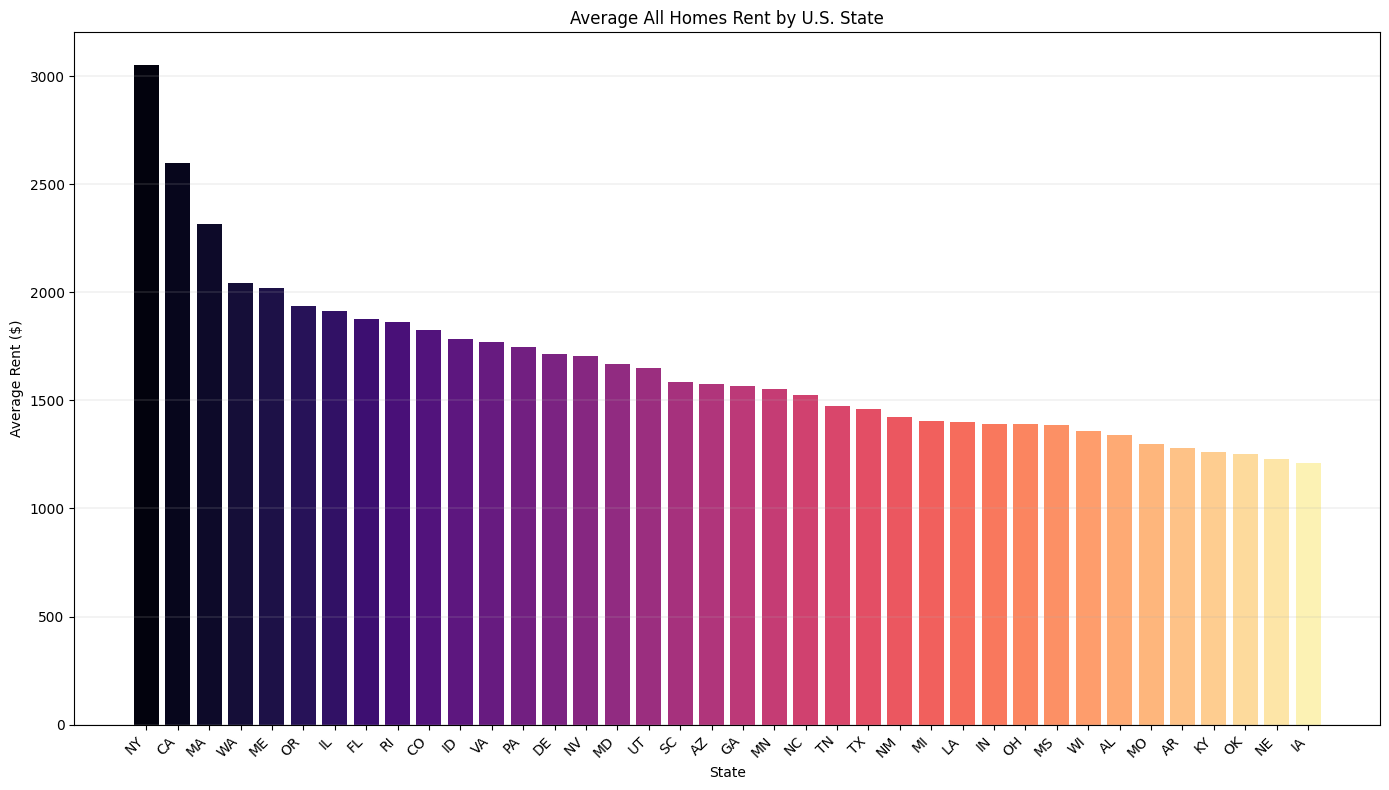

In [12]:
# Bar chart to display the average AllHomesRent by U.S. state, helping understand how housing rent vary geographically

# Compute average rent by state
state_avg_rent = (
    df.groupby("StateName")["AllHomesRent"]
      .mean()
      .sort_values(ascending=False)
)

# Build a custom Viridis-style palette
n_bars   = len(state_avg_rent)
palette  = sns.color_palette("magma", n_bars)

# Plot bar chart with custom colours
plt.figure(figsize=(14, 8))
plt.bar(state_avg_rent.index, state_avg_rent.values, color=palette)
plt.title("Average All Homes Rent by U.S. State")
plt.ylabel("Average Rent ($)")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linewidth=0.3, alpha=0.7)
plt.tight_layout()
plt.show()


### **Key Observations:**
**1.Top States by Rent:**

* NY (New York) has the highest average rent, exceeding $3000.

* Followed by CA (California) and MA (Massachusetts) with significantly high rents.

**2. High-Cost States Cluster:**

* Northeastern and West Coast states dominate the high-rent end (e.g., MA, WA, OR).

* These are typically urbanized states with housing supply constraints and high demand.

**3. Mid-to-Low Rent States:**

* Midwest and Southern states (e.g., IA, NE, OK, KY, AR) have noticeably lower average rents.

* These areas generally have more affordable housing markets.

**4. Rent Spread:**

* The chart shows a clear geographic disparity — the highest rent states are nearly 2.5x more expensive than the lowest ones.

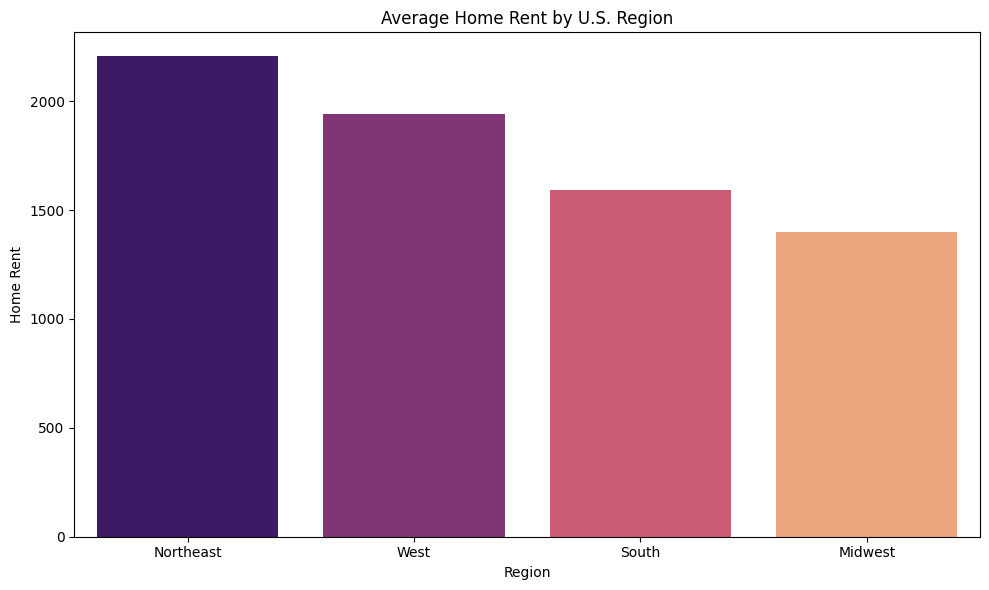

In [13]:
# This bar chart presents a regional comparison of average rent for homes across the U.S.,
# helping visualize geographic housing affordability and market strength.

# Add 'Region' mapping (simplified for U.S. states)
region_map = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West', 'ID': 'West', 'UT': 'West', 'AZ': 'West', 'CO': 'West', 'NM': 'West',
    'MT': 'West', 'WY': 'West', 'AK': 'West', 'HI': 'West',

    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest',

    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast', 'MA': 'Northeast',
    'CT': 'Northeast', 'RI': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'ME': 'Northeast',

    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South',
    'KY': 'South', 'NC': 'South', 'SC': 'South', 'GA': 'South', 'FL': 'South',
    'TN': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South'
}
# Apply region map
df['Region'] = df['StateName'].map(region_map)

# Compute average Median List Price by Region
region_avg = df.groupby("Region")["AllHomesRent"].mean().dropna().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="AllHomesRent", hue="Region", data=region_avg, palette="magma")
plt.title("Average Home Rent by U.S. Region")
plt.ylabel("Home Rent")
plt.xlabel("Region")
plt.tight_layout()
plt.show()
plt.close()

### **Key Observations:**

**1. Northeast has the highest average rent**

* Average rent exceeds $2,200

* Driven by expensive metros like New York City and Boston

**2. West comes next (~$1,950)**

* Includes high-rent states like California, Washington, and Oregon

* Influenced by coastal cities and tech hubs

**3. South is moderately priced (~$1,600)**

* Mix of high-growth but relatively affordable markets (e.g., TX, FL, GA)

**4. Midwest is the most affordable (~$1,400)**

* Lower cost of living and more housing supply in states like IA, OH, IN



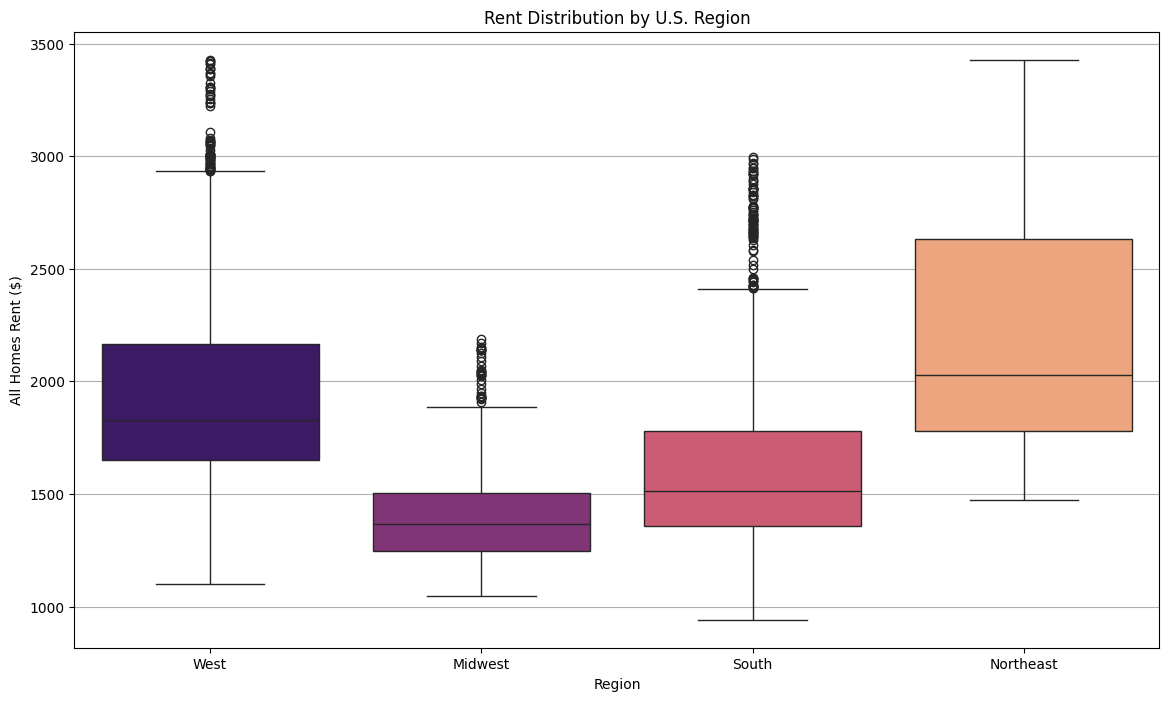

In [14]:
# Plot boxplot of rent distribution over time per region
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Region", y="AllHomesRent", hue="Region", palette="magma")
plt.title("Rent Distribution by U.S. Region")
plt.ylabel("All Homes Rent ($)")
plt.xlabel("Region")
plt.grid(axis='y')
plt.show()

### **Key Observations:**

**1. Northeast:**

* Highest median and widest spread — some states/cities are very expensive

* Many outliers indicating luxury or metro-area rents

**2. West:**

* Also shows a wide spread with a high median rent

* Likely reflects variation from expensive cities (e.g., San Francisco) to affordable areas (e.g., Arizona)

**3. South:**

* Lower median rent, but still shows variability

* Growth states like TX and FL may pull values higher

**4. Midwest:**

* Lowest and tightest range — rents are most stable and affordable



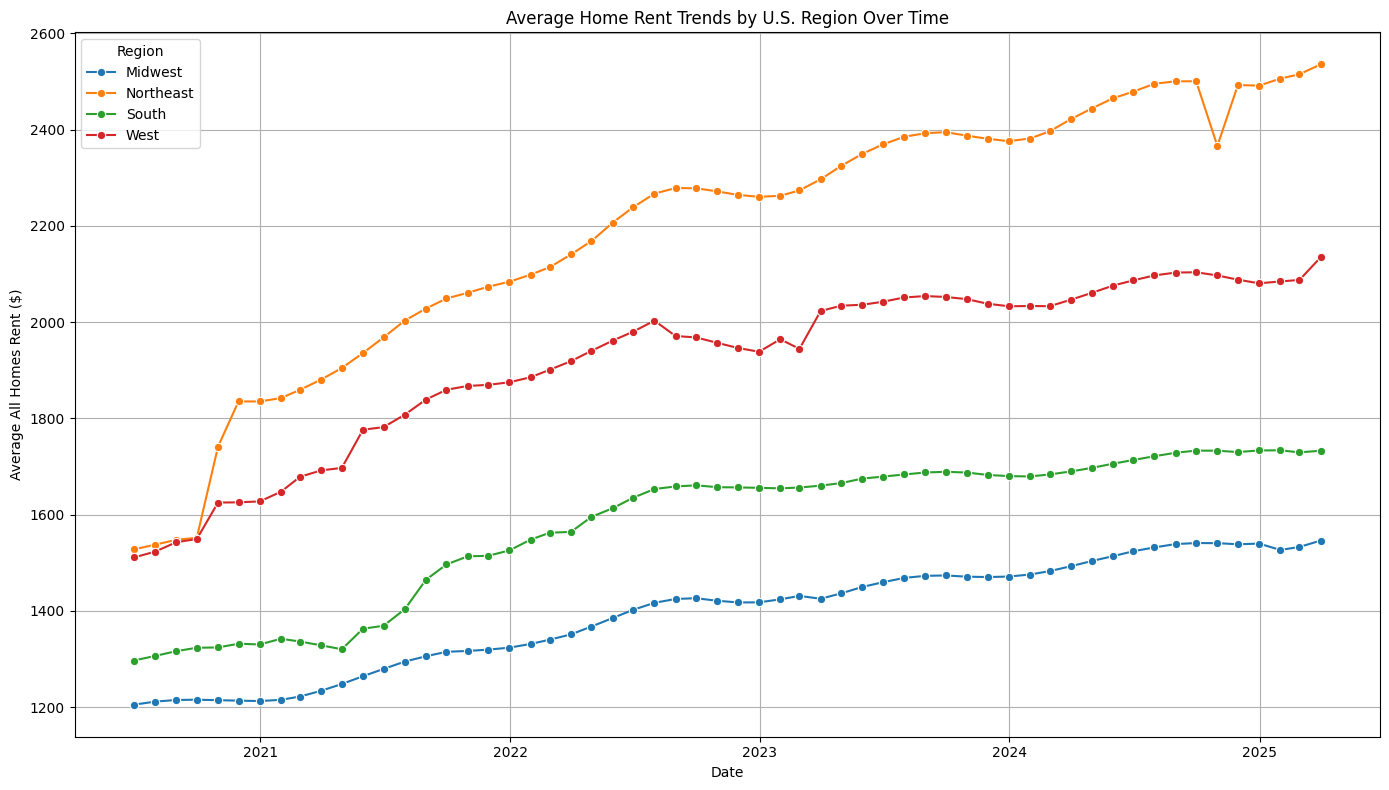

In [15]:

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Group data by Date and Region to compute average rent per month
region_trend = df.groupby(["Date", "Region"])["AllHomesRent"].mean().reset_index()

# Plot rent trends over time by region
plt.figure(figsize=(14, 8))
sns.lineplot(data=region_trend, x="Date", y="AllHomesRent", hue="Region", marker="o")

# Title and labels
plt.title("Average Home Rent Trends by U.S. Region Over Time")
plt.ylabel("Average All Homes Rent ($)")
plt.xlabel("Date")

# Format x-axis to show only year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optional: show ticks only once per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Grid and legend
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

### Key Observations:
**1.  Northeast Leads in Rent Prices**

* Consistently the highest rent across all years

* Crossed $2,500/month average by 2025

* Steady, strong upward trend, indicating persistent demand and/or limited supply

**2. West Region (e.g., CA, WA)**

* Second-highest average rent

* Follows a similar upward trajectory, with some plateau periods (possible market adjustments)

**3. South Region**

* Rents rose steadily from ~1,300 in 2020 to ~$1,730 by 2025

* Demonstrates the impact of population growth in Southern states like TX and FL

**4. Midwest Region**

* Most affordable with the lowest rents, rising from ~1,200 to ~$1,550

* Rent growth is more gradual and stable



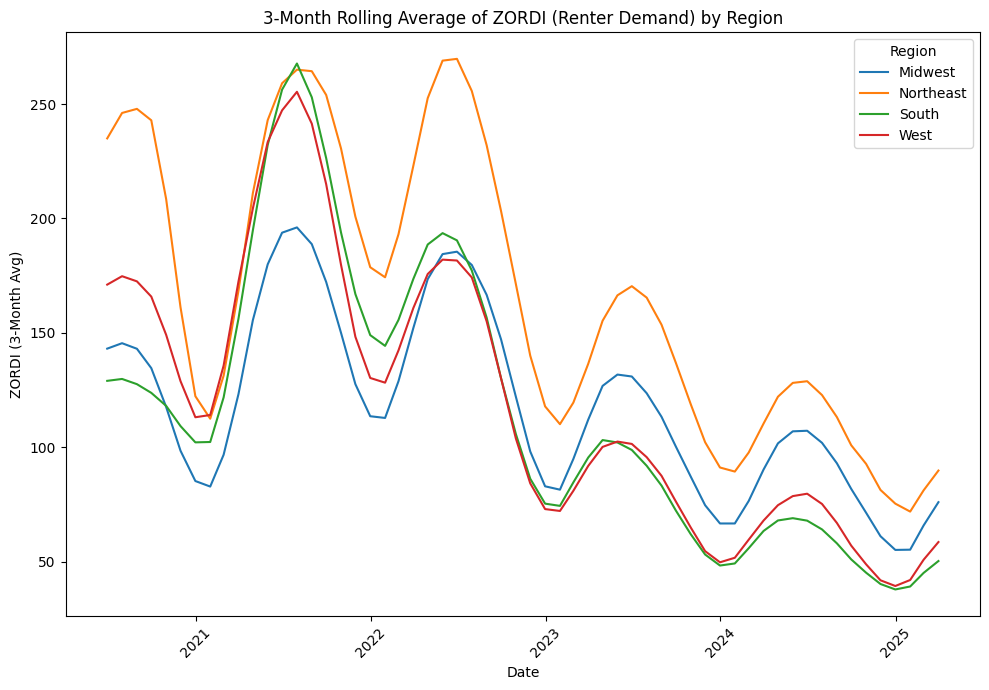

In [16]:
# Zillow Observed Renter Demand Index (ZORDI)

# Group by Region and Date and compute rolling averages
zordi_trend = df.groupby(['Region', 'Date'])['ZORDI'].mean().reset_index()
zordi_trend['RollingAvg_3M'] = zordi_trend.groupby('Region')['ZORDI'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Plot ZORDI trend
plt.figure(figsize=(10, 7))
sns.lineplot(data=zordi_trend, x='Date', y='RollingAvg_3M', hue='Region')
plt.title("3-Month Rolling Average of ZORDI (Renter Demand) by Region")
plt.xlabel("Date")
plt.ylabel("ZORDI (3-Month Avg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()


### **Key Observation**

* **Strong seasonal spikes** occur in spring-summer months, especially in 2021 and 2022.

* **Sharp dips** in Q4 2022 and again in 2023 align with rising interest rates and cost-of-living pressures.

* **Northeast diverges upward** again post-2023, while South and West taper off.



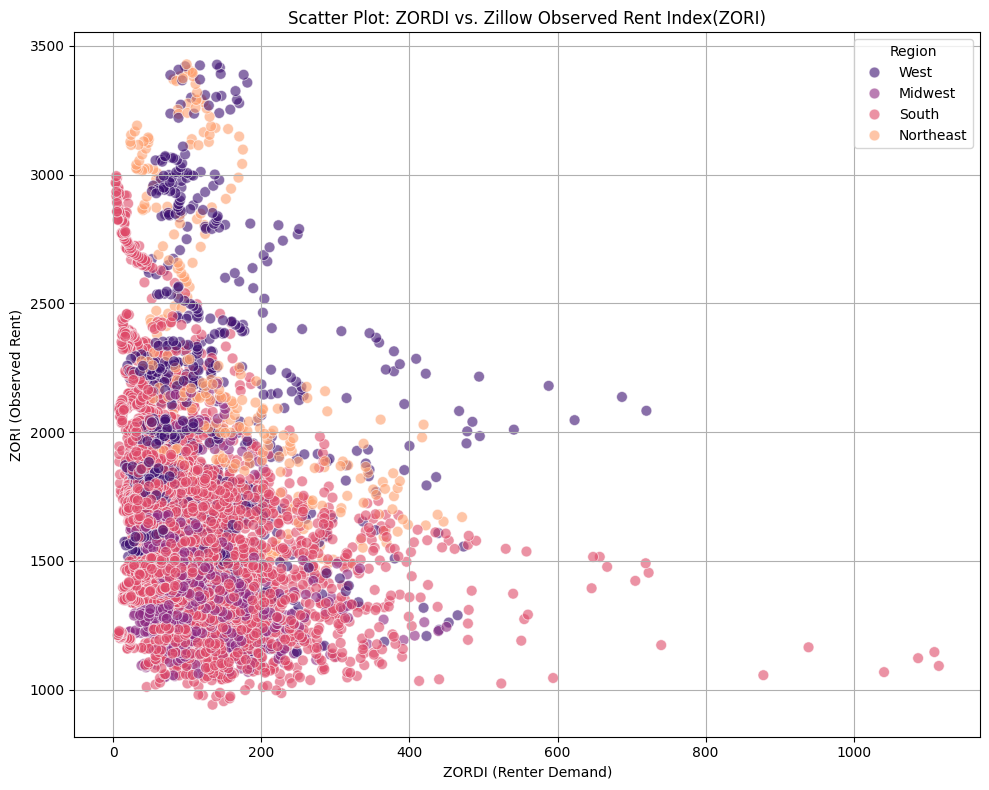

In [17]:
# Scatter Plot: ZORDI vs. Zillow Observed Rent Index(ZORI) (Colored by Region)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Region'] = df['StateName'].map(region_map)

# Drop missing values
df_scatter = df.dropna(subset=['ZORDI', 'AllHomesRent', 'Region'])

# Create scatter plot colored by Region
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scatter, x='ZORDI', y='AllHomesRent', hue='Region', alpha=0.6, edgecolor='white', s=60, palette="magma")
plt.title("Scatter Plot: ZORDI vs. Zillow Observed Rent Index(ZORI)")
plt.xlabel("ZORDI (Renter Demand)")
plt.ylabel("ZORI (Observed Rent)")
plt.grid(True)
plt.legend(title="Region")
plt.tight_layout()
plt.show()
plt.close()


### **Key Observations:**

* ZORDI ≠ ZORI — demand doesn’t translate directly into higher prices without constraints like supply.

* Structural affordability in the South and Midwest means they remain cheap even under rising demand.

* West and Northeast have strong pricing power — rents stay high even with modest interest.



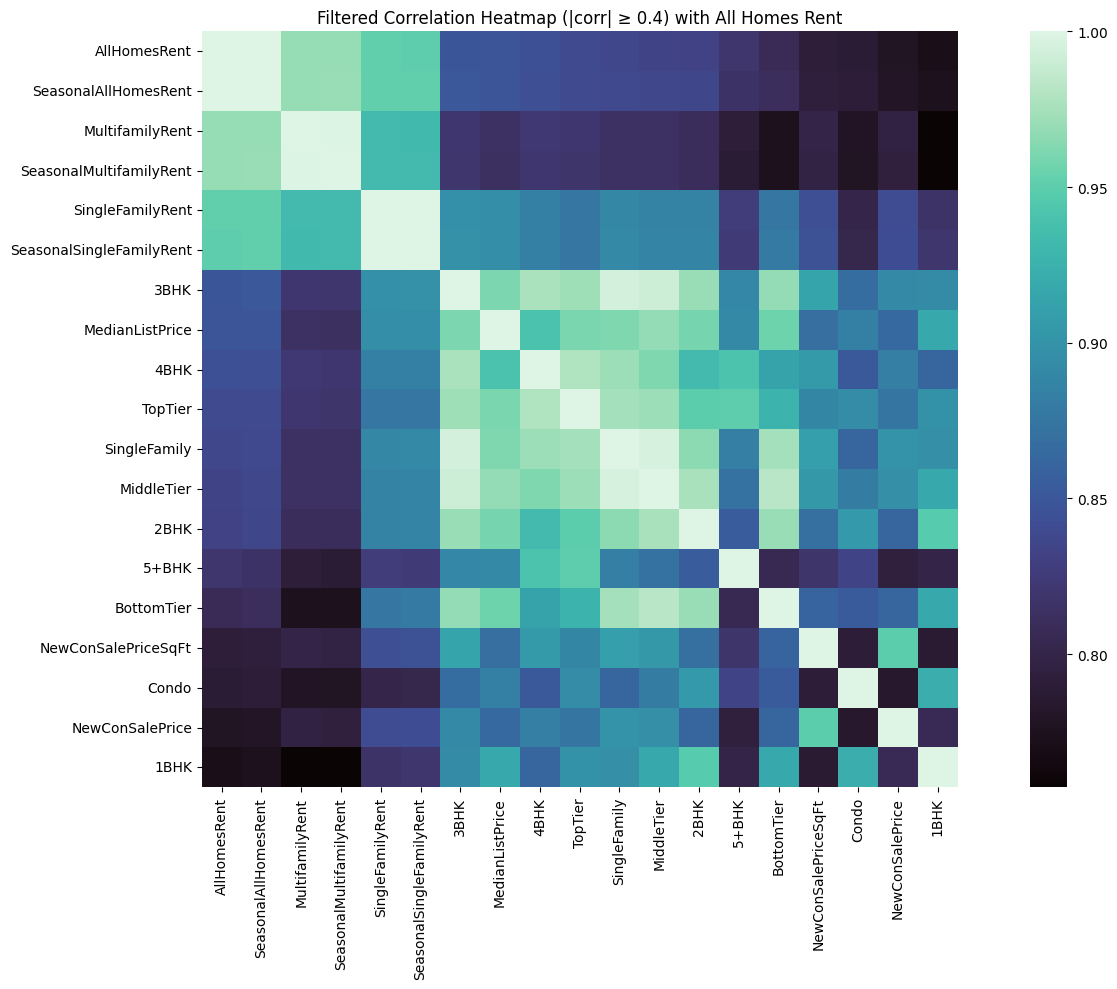

In [18]:
# filtered correlation heatmap that only shows variables with a correlation coefficient ≥ 0.4

# Calculate correlations with All Homes Rent
cor_matrix = df.corr(numeric_only=True)
target_corr = cor_matrix["AllHomesRent"]

# Filter top correlated features (absolute correlation >= 0.4)
filtered_features = target_corr[abs(target_corr) >= 0.4].sort_values(ascending=False)

# Subset correlation matrix to filtered features
filtered_corr_matrix = cor_matrix.loc[filtered_features.index, filtered_features.index]

# Plot filtered heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_corr_matrix, fmt=".2f", cmap="mako", square=True)
plt.title("Filtered Correlation Heatmap (|corr| ≥ 0.4) with All Homes Rent")
plt.tight_layout()
plt.show()
plt.close()

### **Key Observations:**

**1. Top Correlated Features with AllHomesRent:**
  * TopTier, 4BHK, 3BHK
  * MedianListPrice

**2. Clustered Features:**
  Many features are interrelated:

  * TopTier, MedianListPrice, 4BHK, 3BHK, SingleFamily all correlate both with rent and each other

  * This indicates they move together and may introduce multicollinearity in regression models




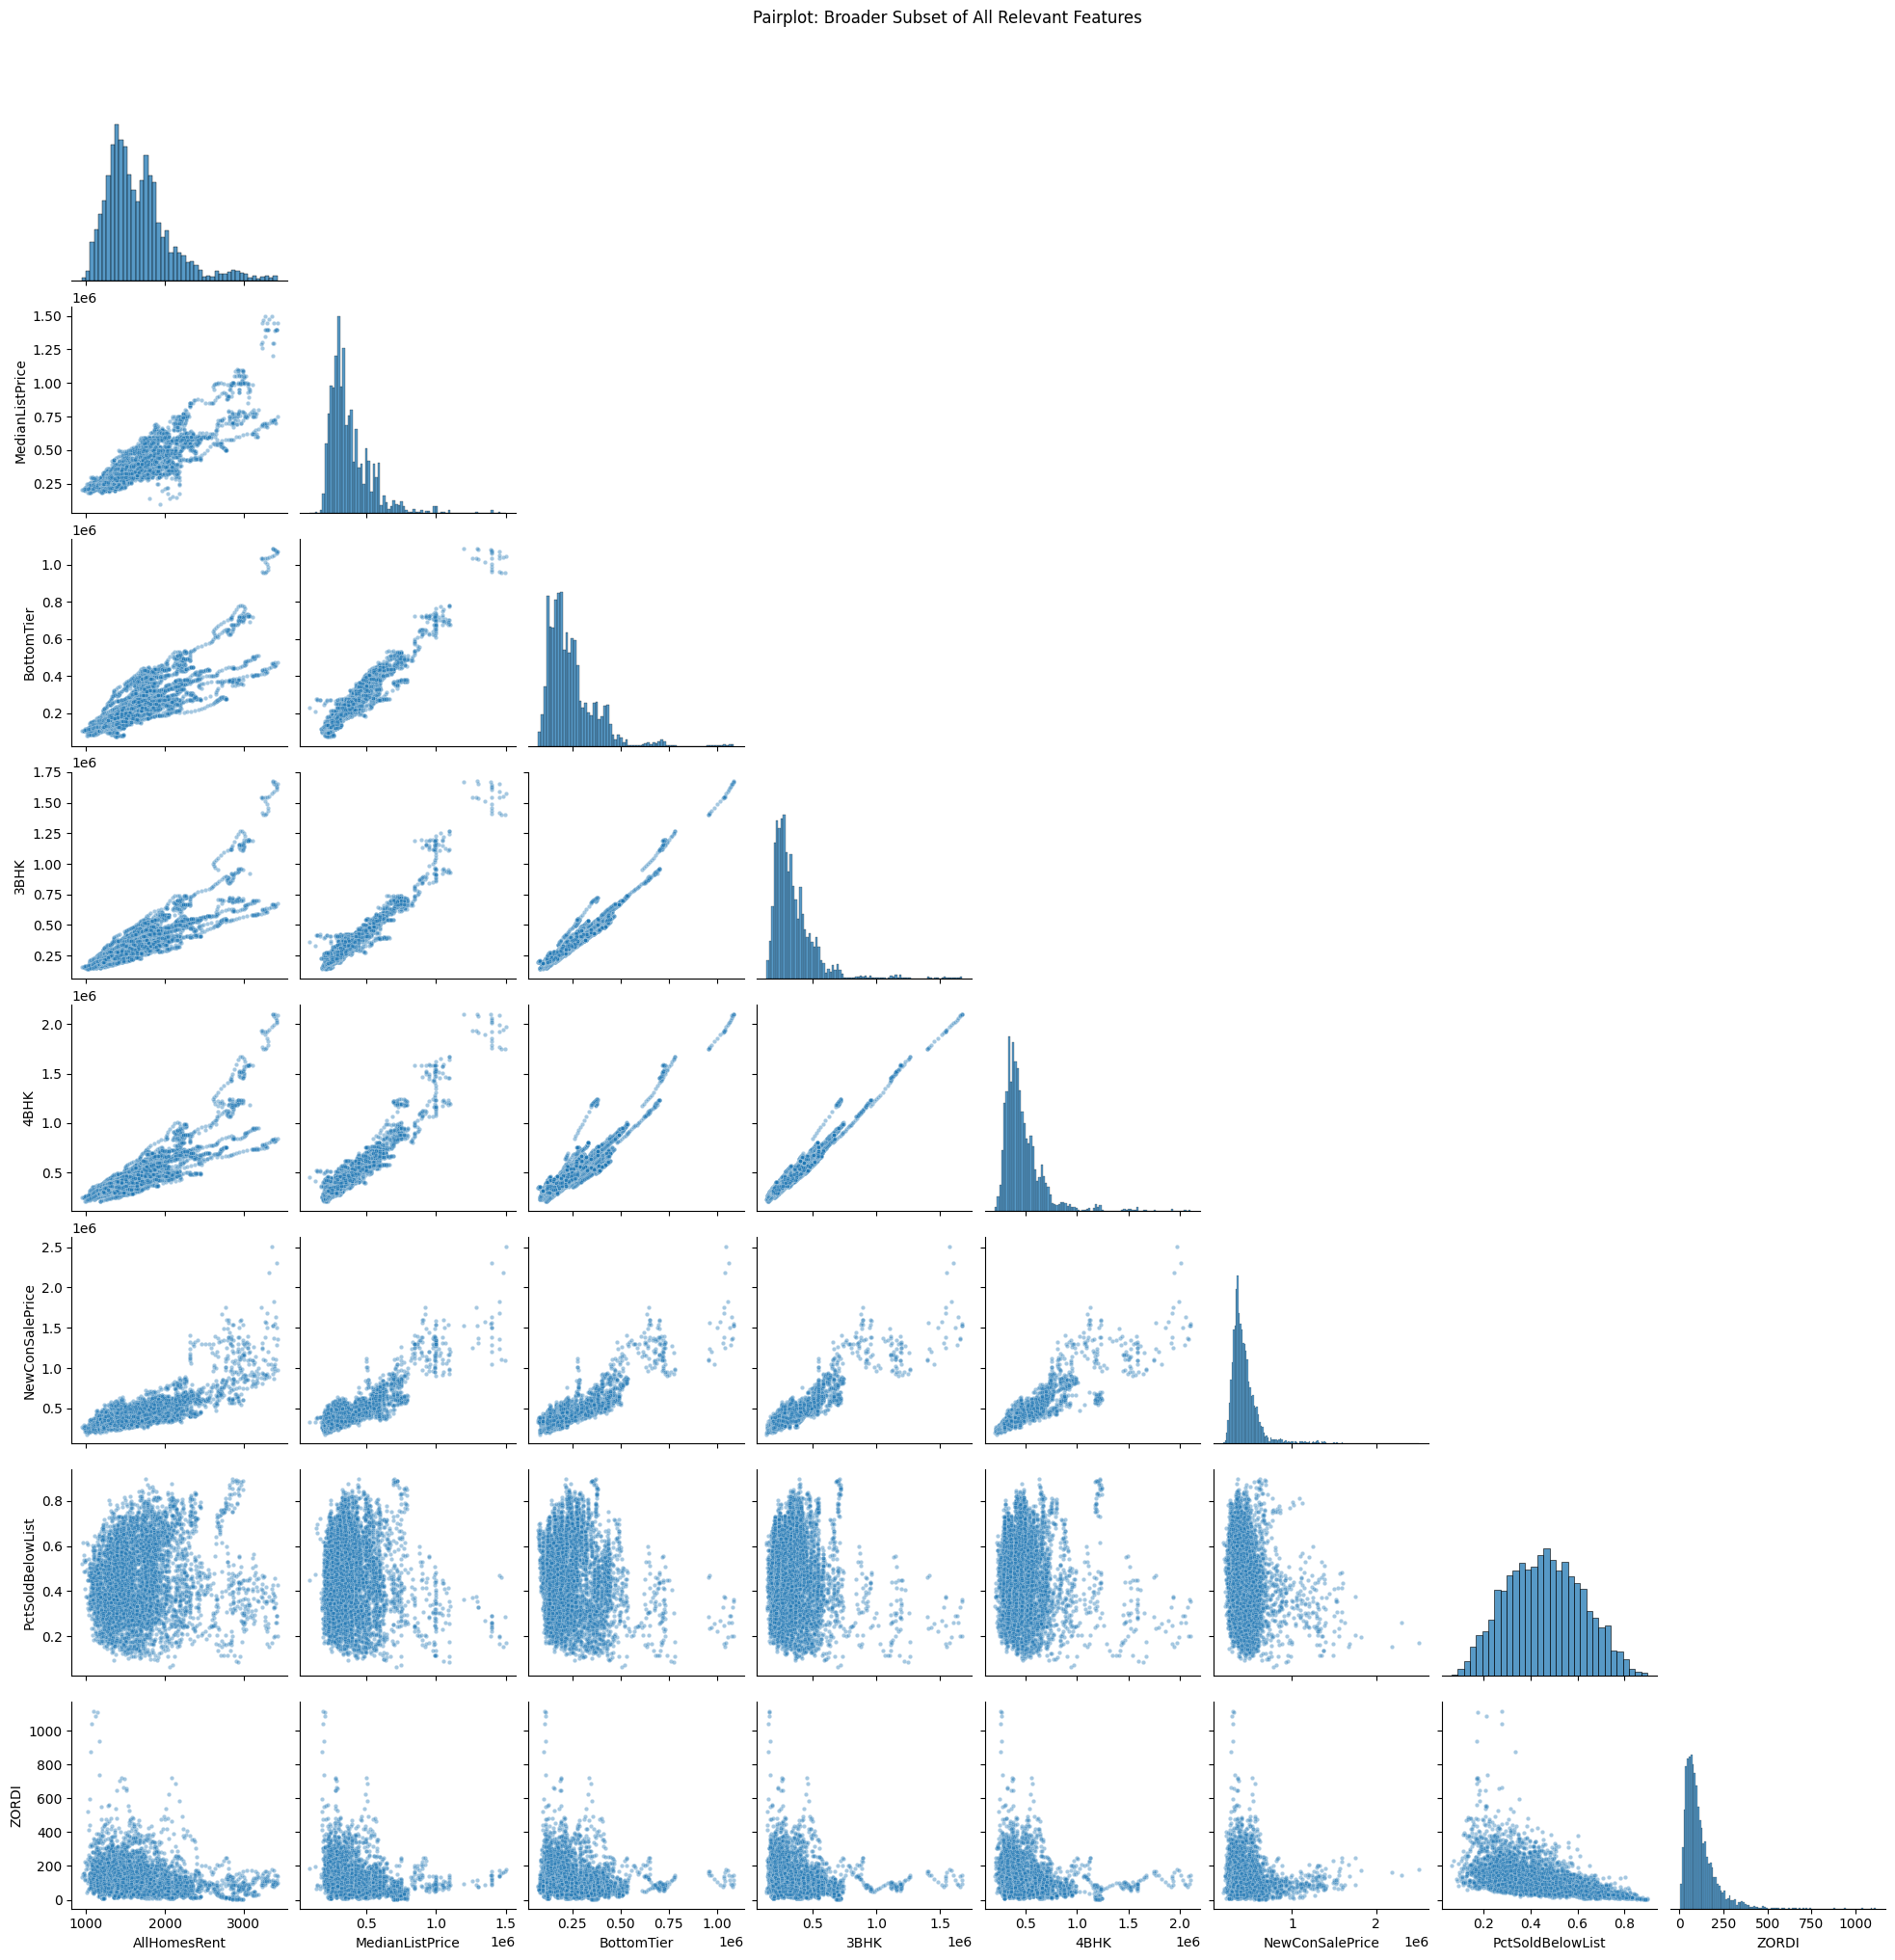

In [19]:
# Pairplot: subset of important features

# Select most relevant and diverse features for the pairplot
selected_all_features = [
    "AllHomesRent",
    "MedianListPrice",
    "BottomTier",
    "3BHK",
    "4BHK",
    "NewConSalePrice",
    "PctSoldBelowList",
    "ZORDI"
]

# Drop rows with missing values
df_pair_all = df[selected_all_features].dropna()

# Create the pairplot for a broader set of features
sns.pairplot(df_pair_all, kind="scatter", corner=True, plot_kws={"alpha": 0.4, "s": 10})
plt.suptitle("Pairplot: Broader Subset of All Relevant Features", y=1.02)
plt.show()


### **Key Observations:**

1. **Strong Positive Correlations (Linear Trends) AllHomesRent** vs:

  * **MedianListPrice:** Higher home listing prices generally align with higher rents

  * **3BHK, 4BHK, NewConSalePrice:** More spacious or newer homes correlate with higher rent

  * **BottomTier, TopTier, and MedianListPrice** are tightly aligned, suggesting these metrics may be collinear

2. **Distinct Nonlinear or Noisy Relationships PctSoldBelowList**:

  * Slight negative curvature when plotted against AllHomesRent, suggesting that in higher-rent markets, fewer homes sell below list price

  * ZORDI (Renter Demand):

    Appears uncorrelated or weakly scattered with rent and other features — indicating renter activity doesn’t directly predict rent levels across regions

3. **Interesting BHK Patterns**
  * 3BHK and 4BHK scale predictably with rent and price

  * Clear upward slope in those scatterplots

  * These can act as strong indicators for unit size and quality



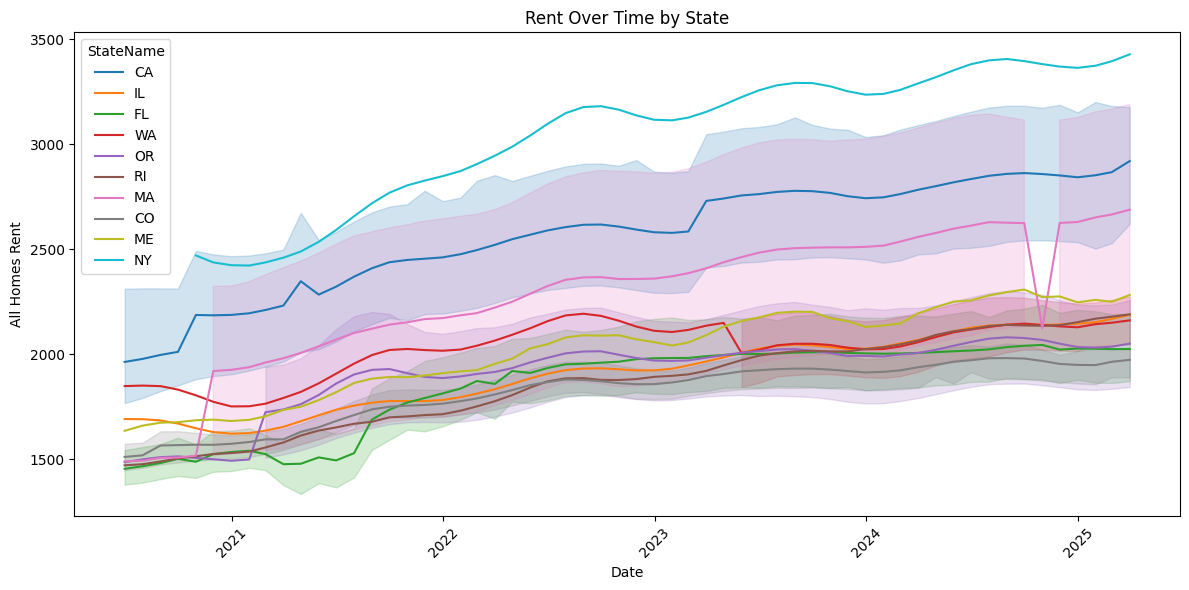

In [20]:
# Filter a few major states for visualization
# Compute mean AllHomesRent by state and select top 10
mean_by_state = df.groupby("StateName")["AllHomesRent"].mean().sort_values(ascending=False)
top_10_states = mean_by_state.head(10).reset_index()
# Filter the main DataFrame to include only top 10 states
filtered_df = df[df['StateName'].isin(top_10_states['StateName'])]


# --- Line plot of Median List Price over time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Date', y='AllHomesRent', hue='StateName')
plt.title("Rent Over Time by State")
plt.xlabel("Date")
plt.ylabel("All Homes Rent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

This line chart with confidence bands shows how average All Homes Rent has evolved over time in the top 10 U.S. states by rent.

### **Key Observations:**
1. New York (NY) is the leader:
  * Rent rises from $2,400 to $3,400 by 2025

  * Large shaded band suggests significant seasonal or regional variance within the state

2. California (CA) is next:
  * Climbing steadily past $2,800

  * Also shows high internal variability, especially mid-2021 and mid-2024

3. Massachusetts (MA) and Washington (WA):
  * Upper-mid rent bracket ( ~$2,300 – $2,700)

  * Show more consistent and smooth trends

4. Lower States (ME, CO, RI, OR):
  * Rents stay mostly under $2,200

  * Less fluctuation — likely more price-stable markets



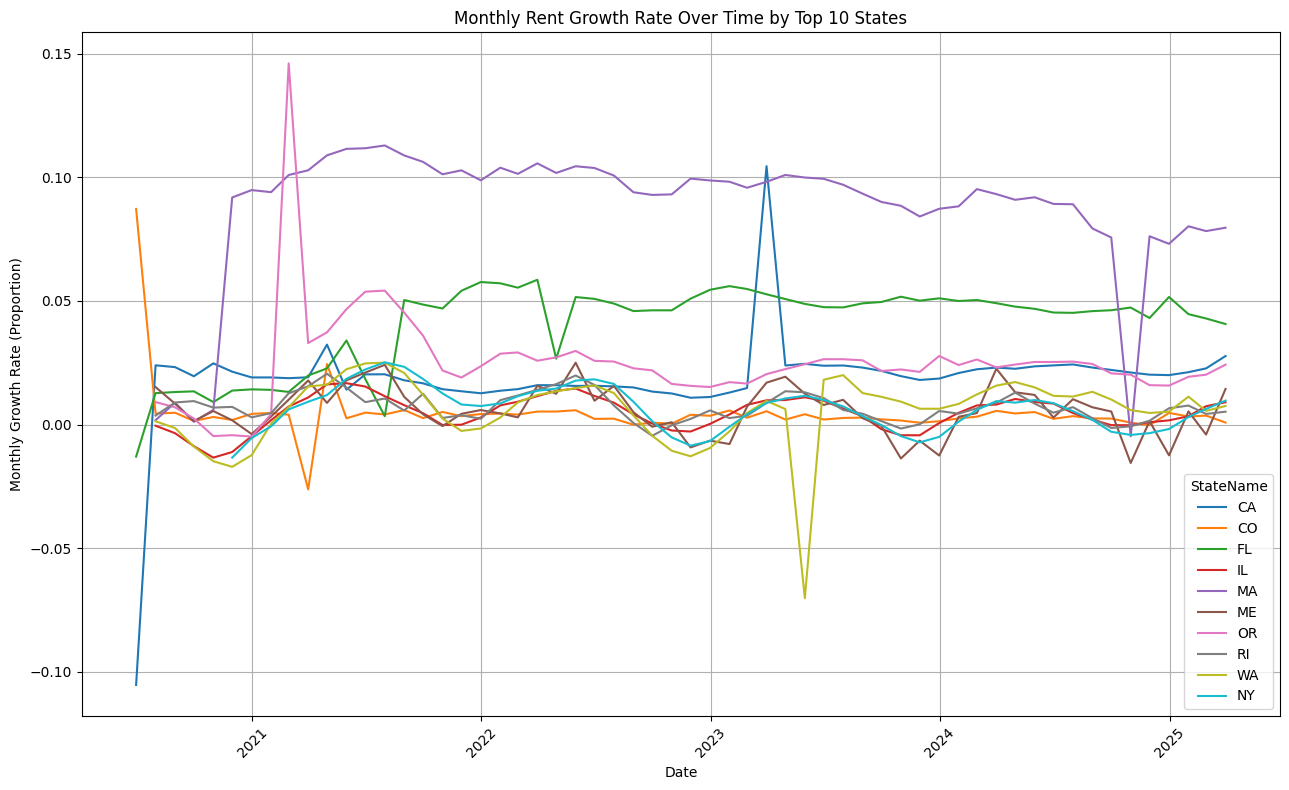

In [21]:

# Ensure we're using a clean copy to avoid SettingWithCopyWarning
filtered_df = df[df["StateName"].isin(df.groupby("StateName")["AllHomesRent"]
                                      .mean()
                                      .sort_values(ascending=False)
                                      .head(10)
                                      .index)].copy()

# Step 1: Sort and compute percent change in rent over time per state
filtered_df["Date"] = pd.to_datetime(filtered_df["Date"])
filtered_df = filtered_df.sort_values(["StateName", "Date"])
filtered_df["RentGrowthRate"] = filtered_df.groupby("StateName")["AllHomesRent"].pct_change()

# Step 2: Aggregate monthly average growth rates
growth_trend = filtered_df.groupby(["Date", "StateName"])["RentGrowthRate"].mean().reset_index()

# Step 3: Plot rent growth rates over time
plt.figure(figsize=(13, 8))
sns.lineplot(data=growth_trend, x="Date", y="RentGrowthRate", hue="StateName")
plt.title("Monthly Rent Growth Rate Over Time by Top 10 States")
plt.ylabel("Monthly Growth Rate (Proportion)")
plt.xlabel("Date")
plt.grid(True)

# Format x-axis for years only
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


This chart visualizes the monthly rent growth rate over time for the top 10 U.S. states ranked by average rent.

### **Key Observations:**

**High Volatility:**
* MA (Massachusetts) and OR (Oregon):

* Spikes above 10–15% monthly growth early in 2021–2022

* These may reflect:

  * Post-pandemic recovery surges

  * Data anomalies or regional price corrections

**Consistent Positive Growth:**
* FL (Florida):

* Steady ~4–5% monthly growth from 2021–2024

* Indicates sustained upward pressure on rents

**Stable Performers:**
CA, NY, WA, ME:

* Show smaller, more predictable month-to-month changes

* Fluctuate near 0–3% monthly growth

**Temporary Drops:**
CO, IL, ME:

* Occasional negative growth months (e.g., −6% to −10%)

* Could reflect seasonal corrections or supply/demand shocks



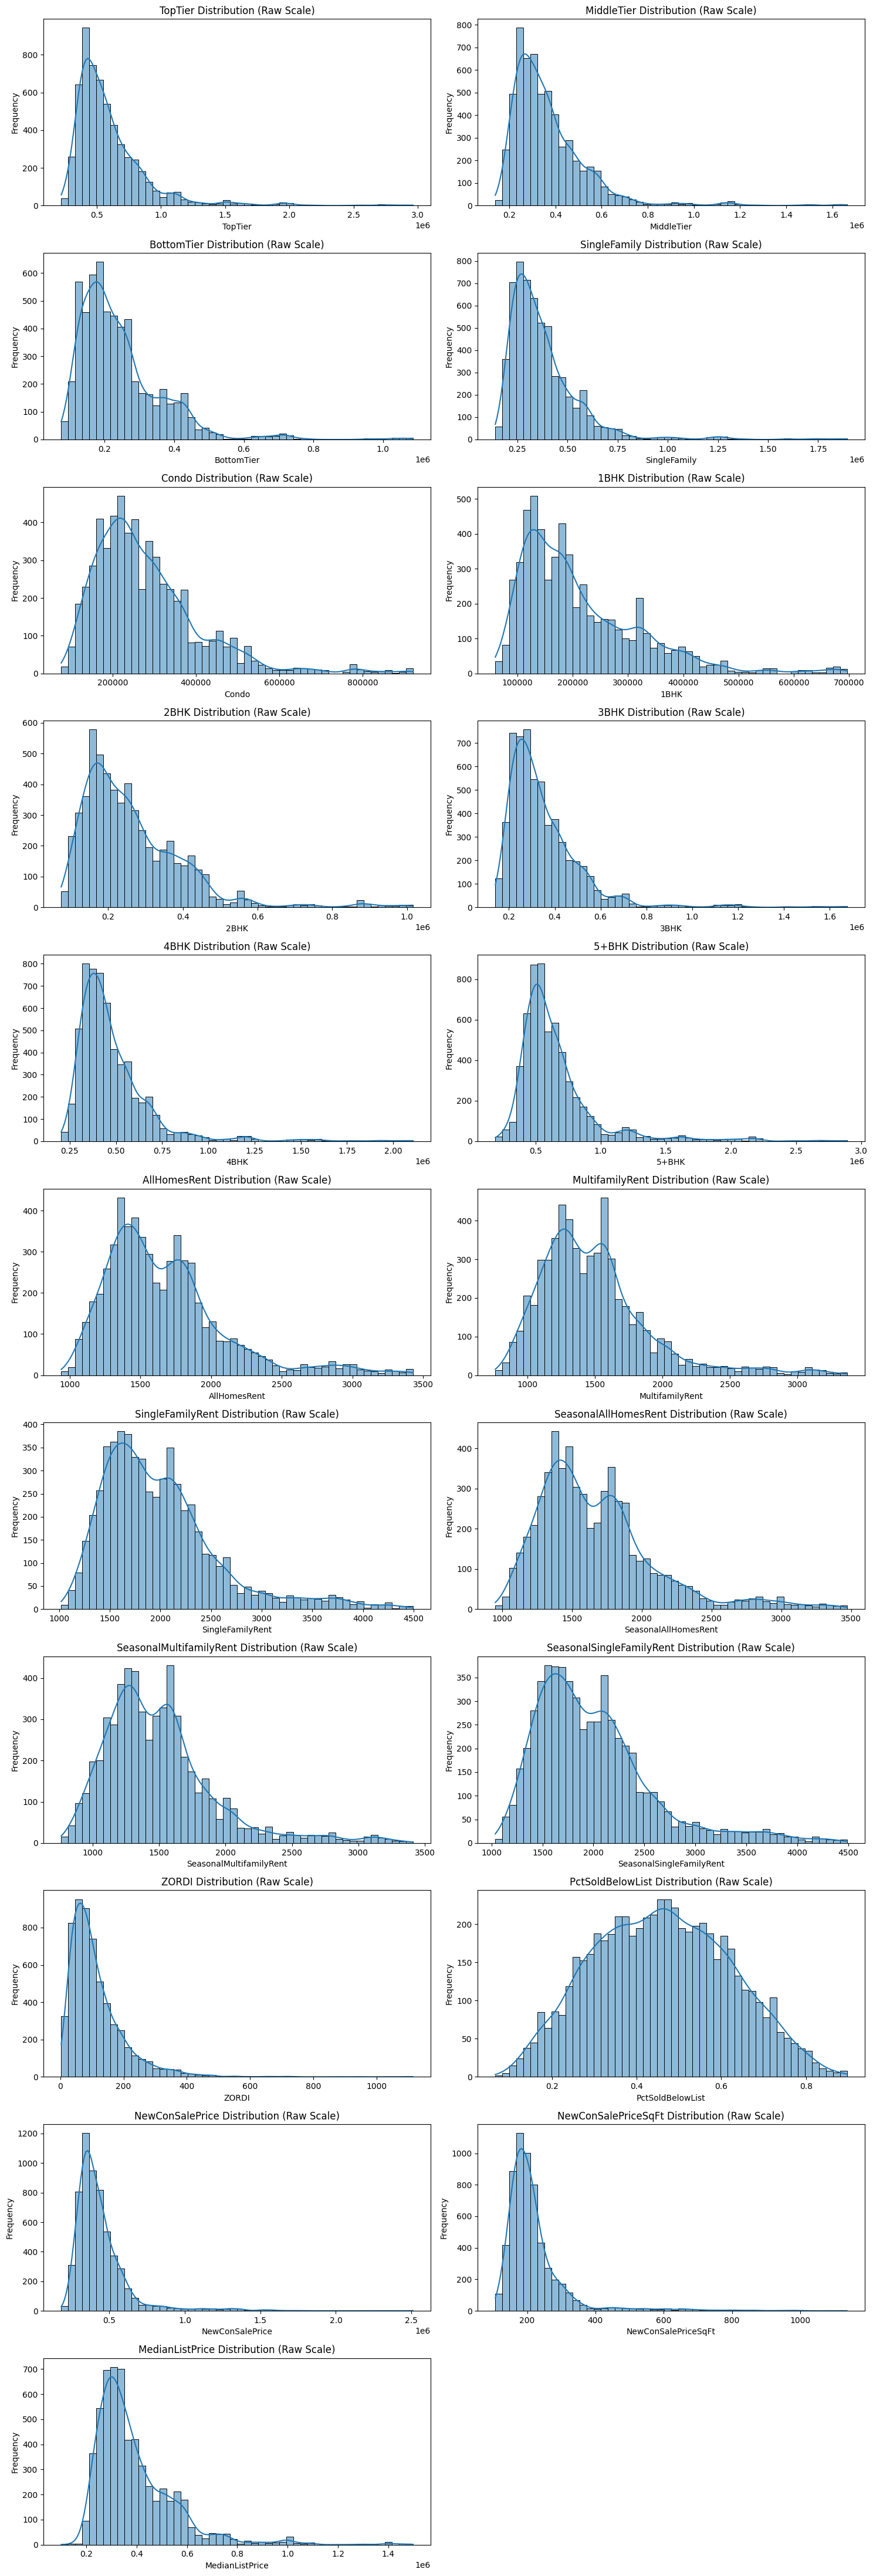

In [22]:
# Ploting histograms (without log transformation)

# Select numeric columns for plotting (before log transform)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Determine layout
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'{col} Distribution (Raw Scale)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:
# --- Log transformation (add 1 to avoid log(0)) ---
log_transformed_df = np.log1p(df[numeric_cols])
log_transformed_df.columns = [f'{col}_log' for col in numeric_cols]

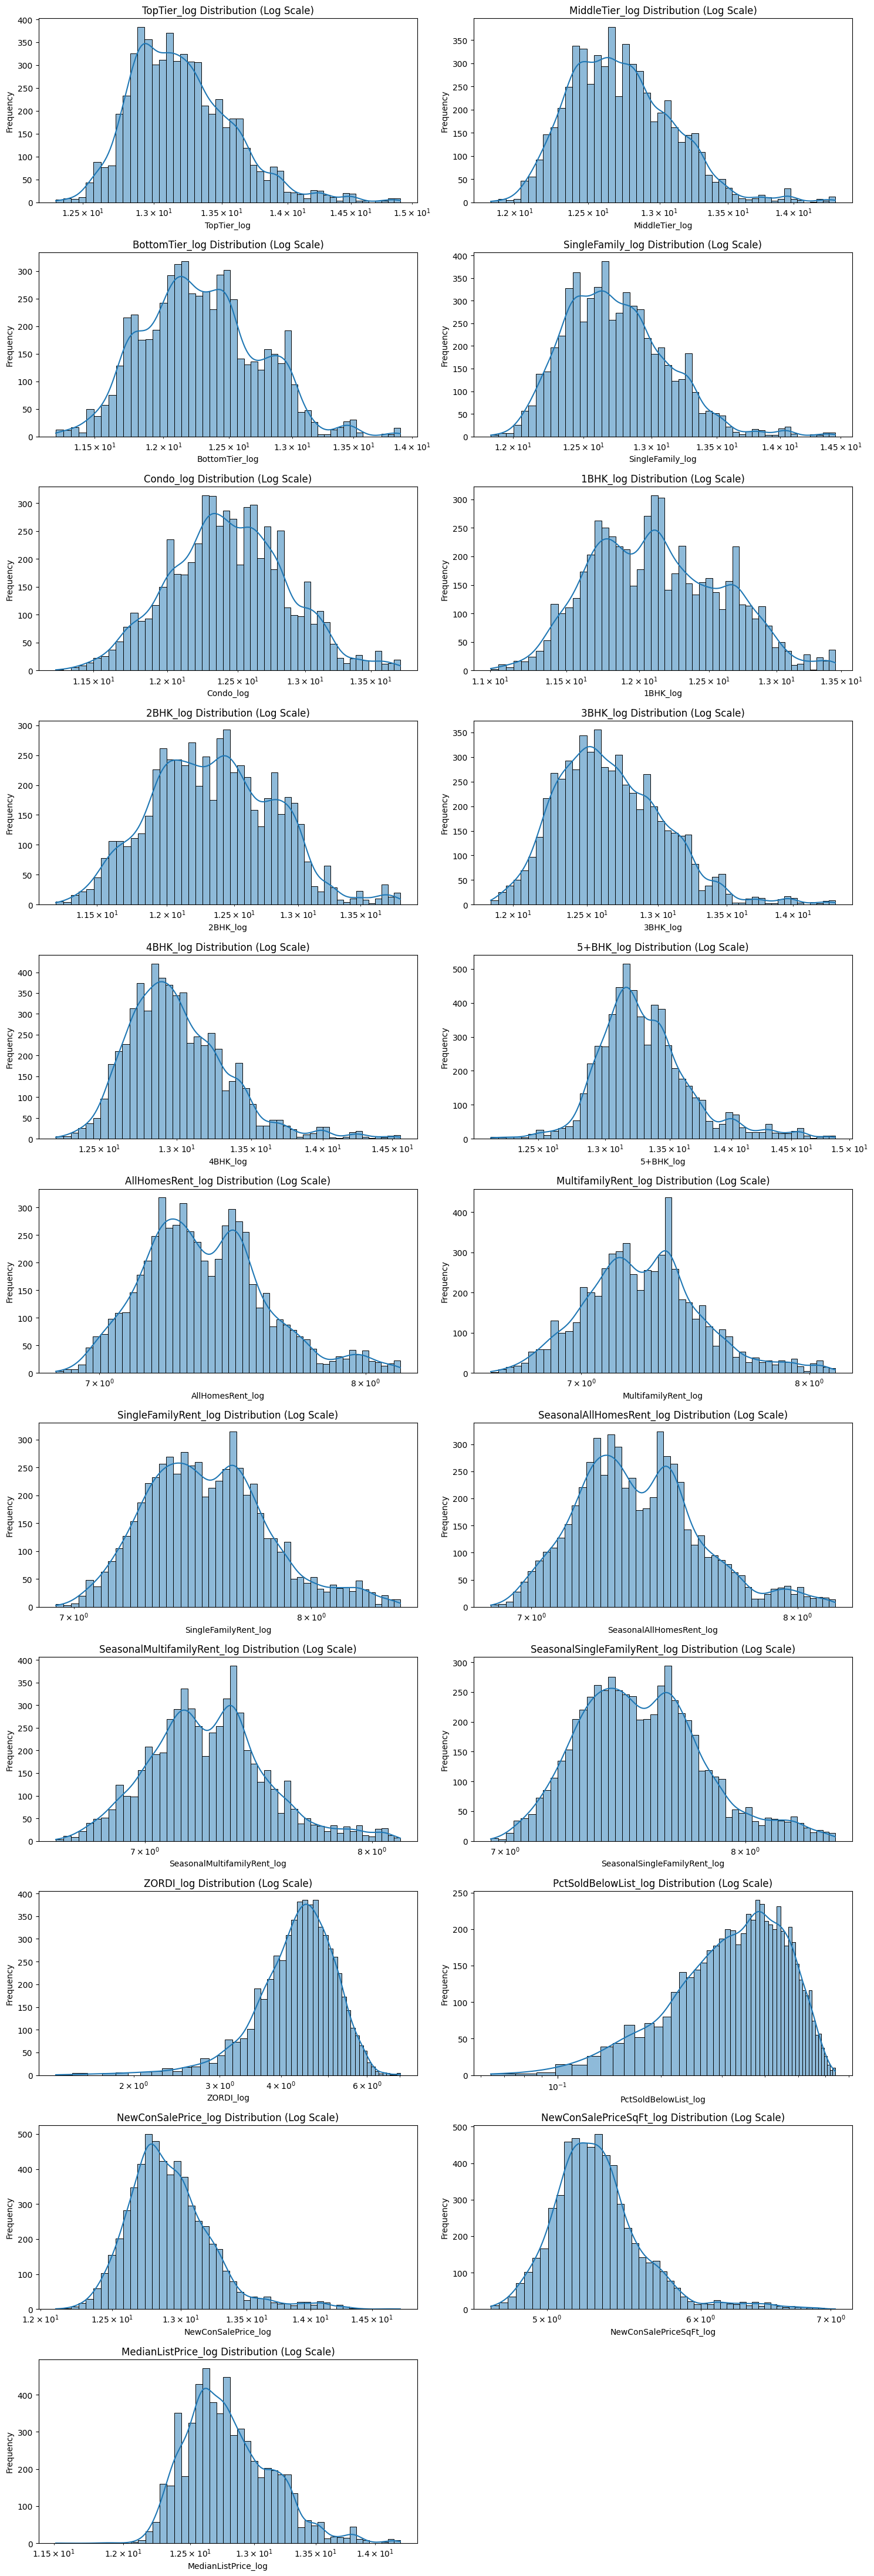

In [24]:
# Create histograms with log scale on x-axis

# Number of columns to plot
columns_to_plot = log_transformed_df.columns
n_cols = 2
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Plotting
plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(log_transformed_df[col], bins=50, kde=True)
    plt.xscale('log')
    plt.title(f'{col} Distribution (Log Scale)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### **Raw Scale Distributions**
* **Highly right-skewed:** Most price-related variables (e.g., TopTier, SingleFamily, 1BHK, ZORDI, MedianListPrice) show long tails.

* **Wide range:** Values vary by orders of magnitude, making it hard to see variation among lower/mid-range values.

* **Outliers dominate:** A small number of large values disproportionately stretch the x-axis, compressing the bulk of the distribution.



#### **Log-Transformed Distributions**
* **More symmetric:** Log transformation reduces skewness, making distributions appear closer to normal.

* **Better visibility of mid-range:** Compresses the effect of outliers and expands detail in the lower/mid range.

* **Improved interpretability:** Useful for modeling, especially with linear models, where normality improves performance.